<a href="https://colab.research.google.com/github/JustinJohnsonK/OptionShortStraddle/blob/main/NIFTY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NIFTY DAY CHANGE ANALYSIS AND HOW TO PREDICT**

Here I collected all the historic data for nifty from [NSE website](https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm)
and calcuate the day change from opening and closing price.

Next we collect all the Central Pivot Range values and match the values to the change in nifty daily.

Hence we will be able to get a range for CPR which will help us to predict the market will be trending today or not.

This help us create straddle for intradays and create more probability for the trades taken.




In [1]:
import pandas as pd
import numpy as np
import os
import glob

# Pull data From NSE Site
Here I had already stored it in my googledrive

In [2]:
# Merge all files from Nifty historic data
# Files are downloaded and stored in local drive.
# Files are available from NSE website - details in discription
path = '/content/drive/MyDrive/NiftyData'              # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [ ]:
len(df.index)

2718

# Clean the data

In [3]:
# Sort the merged files based on date
df['Date'] = pd.to_datetime(df.Date)
df = df.sort_values(by="Date")

In [4]:
# Reset the index after sorting based on date
# This is required for calculating the CPR for previous day
df = df.reset_index(drop=True)

In [5]:
# Test Code
for index, row in df.iterrows():
  if index > 2700:
    print(index, row["Date"])
    dfObj = df.iloc[index-1, [2, 3,4]]
    print(dfObj["Close"])


2701 2021-05-19 00:00:00
15108.1
2702 2021-05-20 00:00:00
15030.15
2703 2021-05-21 00:00:00
14906.05
2704 2021-05-24 00:00:00
15175.3
2705 2021-05-25 00:00:00
15197.7
2706 2021-05-26 00:00:00
15208.45
2707 2021-05-27 00:00:00
15301.45
2708 2021-05-28 00:00:00
15337.85
2709 2021-05-31 00:00:00
15435.65
2710 2021-06-01 00:00:00
15582.8
2711 2021-06-02 00:00:00
15574.85
2712 2021-06-03 00:00:00
15576.2
2713 2021-06-04 00:00:00
15690.35
2714 2021-06-07 00:00:00
15670.25
2715 2021-06-08 00:00:00
15751.65
2716 2021-06-09 00:00:00
15740.1
2717 2021-06-10 00:00:00
15635.35


# Calculations

In [6]:
# Find Percentage chage in a day
find_change = lambda v1, v2: (abs(v1-v2)*100)/(v1)

In [7]:
# Add the Percentage Change tab to dataframe
df["Change"] = [find_change(row["Open"], row["Close"]) for index, row in df.iterrows()]

In [12]:
# Calculate CPR range or width - using previous day Low, High and Close 
def CPR_Range(index, dfObj):
  if index == 0:
    return 0
  print(index)
  High, Low, Close = dfObj["High"], dfObj["Low"], dfObj["Close"]
  Pivot = (High + Low + Close)/3
  Bottom_CPR = (High + Low)/2
  Top_CPR = (Pivot - Bottom_CPR) + Pivot
  return abs(Top_CPR - Bottom_CPR)

In [13]:
# Add the CPR to dataframe
df["CPR_Width"] = [CPR_Range(index, df.iloc[index-1, [2, 3,4]]) for index, _ in df.iterrows() if index<len(df.index)]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [14]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Change,CPR_Width
0,2010-06-28,5271.10,5339.45,5270.75,5333.50,154140414,6284.06,1.183814,0.000000
1,2010-06-29,5333.55,5334.15,5235.80,5256.15,158720263,5859.41,1.451191,18.933333
2,2010-06-30,5254.25,5320.35,5210.00,5312.50,183722824,7083.92,1.108626,19.216667
3,2010-07-01,5312.05,5312.55,5232.10,5251.40,141430947,5489.08,1.141744,31.550000
4,2010-07-02,5251.25,5277.25,5225.60,5237.10,149979351,5158.26,0.269460,13.950000


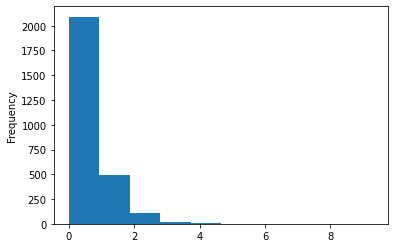

In [15]:
# Plot the Day change histogram
df["Change"].plot(kind="hist")

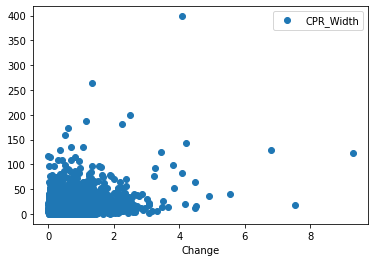

In [16]:
# Plot the relation between CPR and Nifty range
df.plot(x='Change', y='CPR_Width', style='o')